# k-medias

In [11]:
! pip install mlxtend
! pip install yellowbrick
! pip install split-folders

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings("ignore")
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [22]:
# Leemos los datos con los que vamos a trabajar
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv", sep=',')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
df_limpio = df[['Latitude', 'Longitude', 'MedInc']]
df_limpio.head()


,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


## Separar los datos de entrenamiento

In [24]:
X_train, X_test = train_test_split(df_limpio, test_size = 0.2, random_state = 42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


## Paso 2: Construye un K-Means



In [25]:
model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_unsup.fit(X_train)

y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

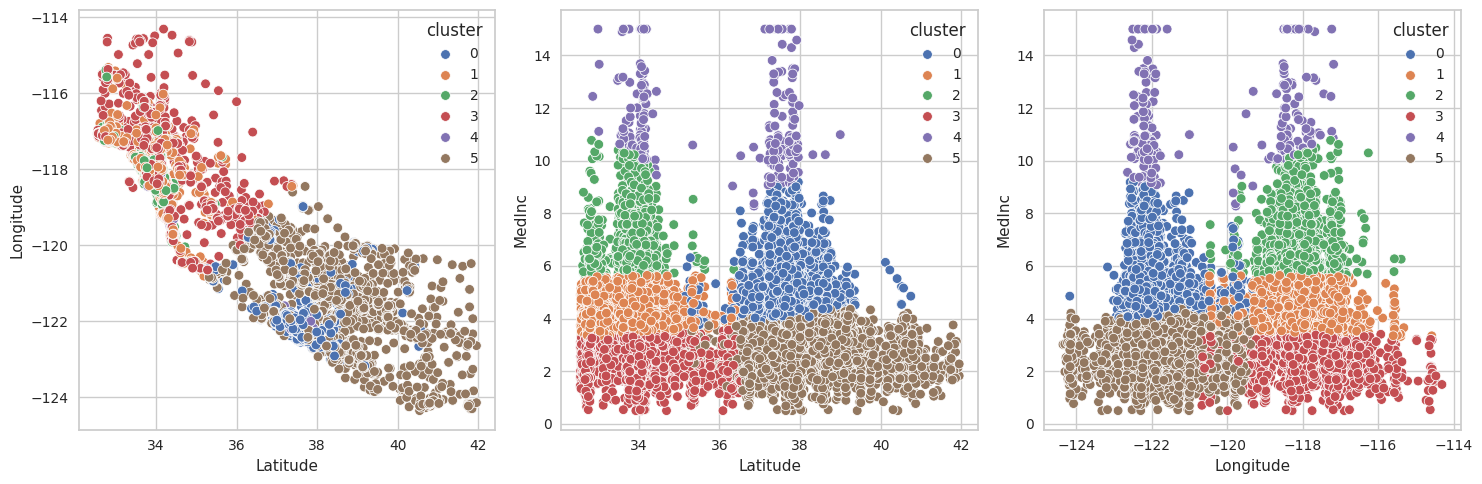

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

## Paso 3: Predice con el conjunto de test


In [27]:
y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

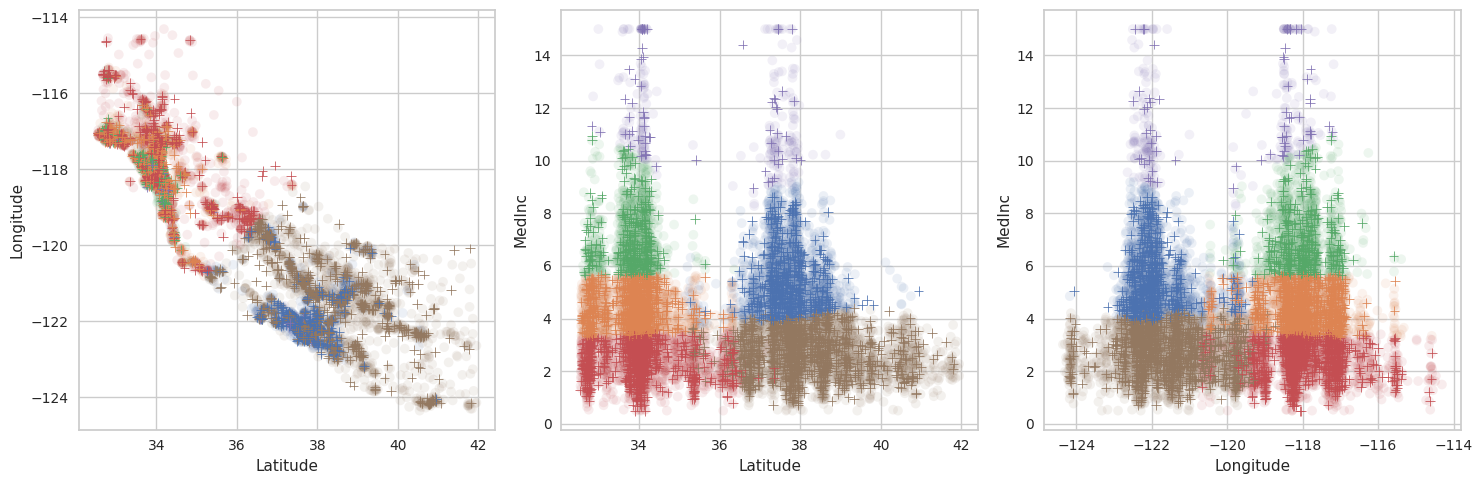

In [28]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

## Paso 4: Entrena un modelo de clasificación supervisada


In [29]:
model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

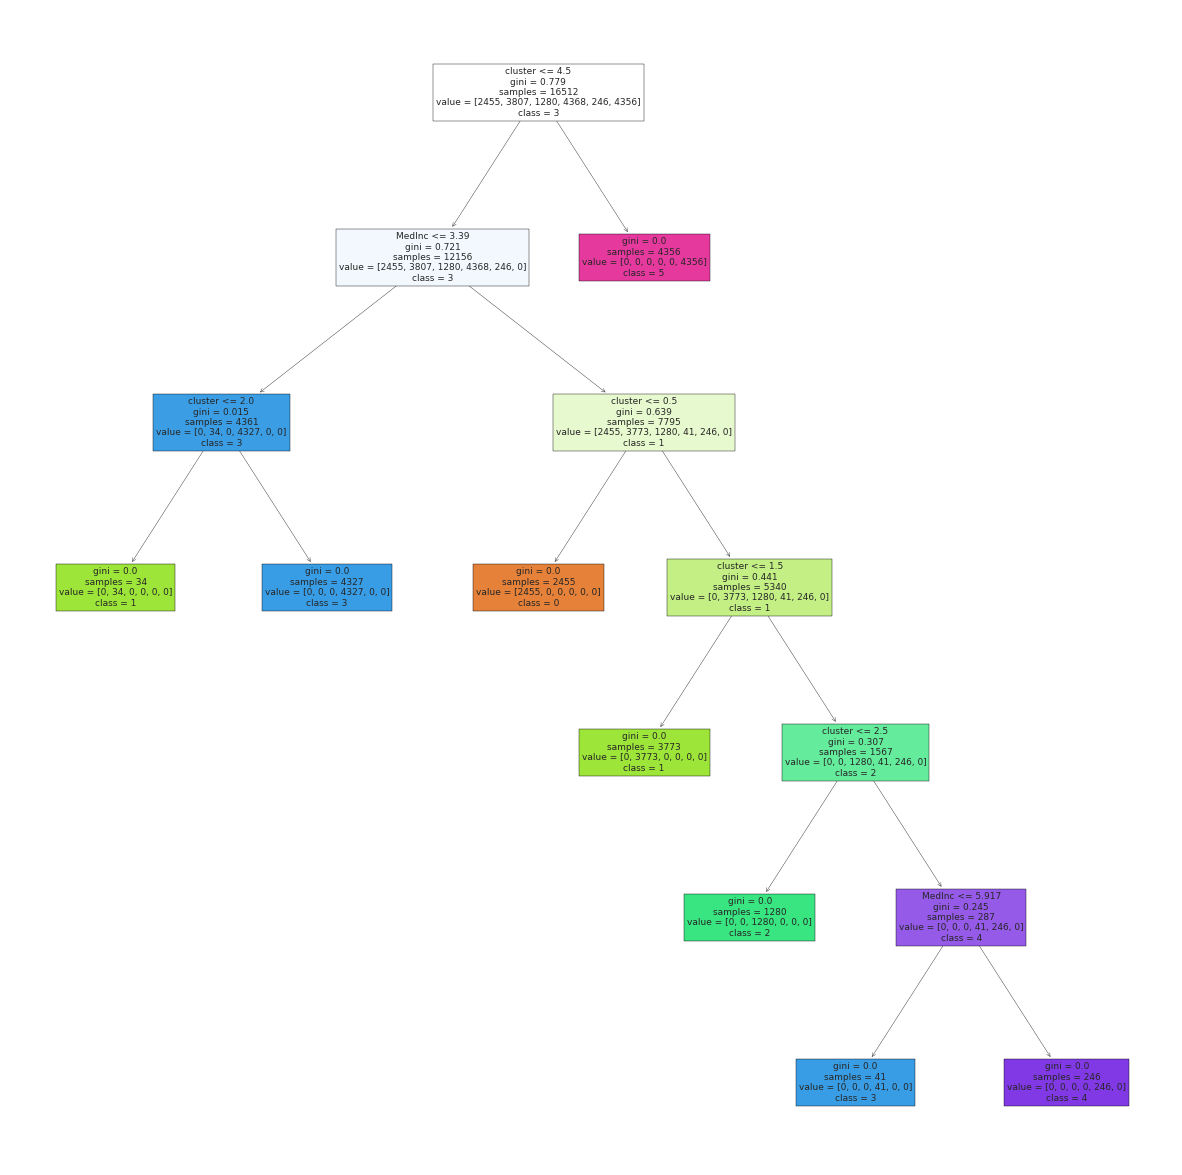

In [30]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [31]:
y_pred = model_sup.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

1.0

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans

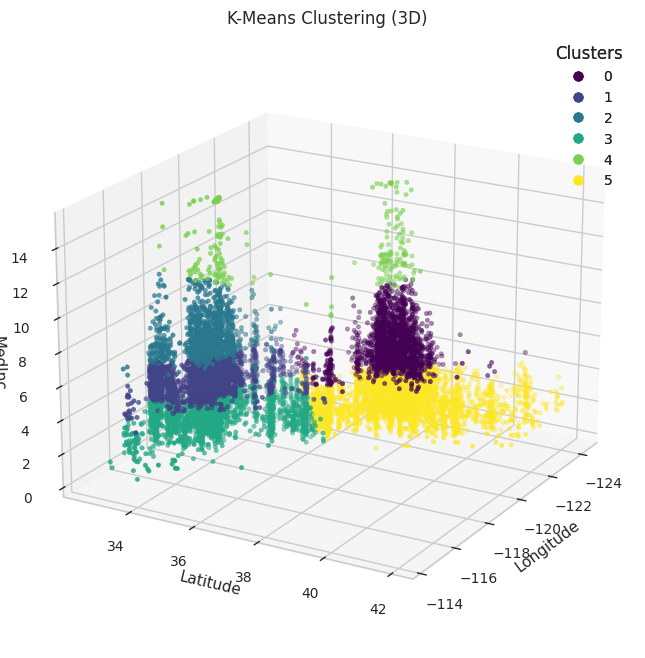

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame with the 'Cluster' column

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the complete set
scatter = ax.scatter(X_train['Longitude'], X_train['Latitude'], X_train['MedInc'], c=X_train['cluster'], cmap='viridis', s=10, label='Complete Set')

ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')

# Set specific view angles
ax.view_init(elev=20, azim=30)  # Adjust the elevation (up/down) and azimuth (rotation around z-axis) angles

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

plt.show()